In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

import warnings
warnings.filterwarnings("ignore")

In [3]:
groceries= pd.read_csv(r'Grocery_Items_29.csv')
grocery_df = [row.dropna().tolist() for index, row in groceries.iterrows()]
te = TransactionEncoder()
te_ary = te.fit(grocery_df).transform(grocery_df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Using minimum support = 0.01 and minimum confidence threshold = 0.1

In [4]:
frequent_items = apriori(df, min_support=0.01, use_colnames=True)
association_rules(frequent_items, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.123625,0.1615,0.014750,0.119312,0.738777,-0.005215,0.952097
1,(rolls/buns),(whole milk),0.112500,0.1615,0.015000,0.133333,0.825593,-0.003169,0.967500
2,(soda),(whole milk),0.094000,0.1615,0.011750,0.125000,0.773994,-0.003431,0.958286
3,(yogurt),(whole milk),0.084250,0.1615,0.011125,0.132047,0.817631,-0.002481,0.966067


### Use minimum support values (msv): 0.001, 0.005, 0.01 and minimum confidence threshold (mct): 0.05, 0.075, 0.1. 

<AxesSubplot:xlabel='msv', ylabel='mct'>

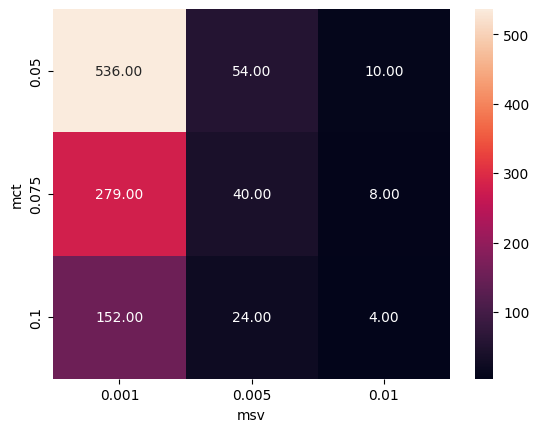

In [10]:
msv =[ 0.001, 0.005, 0.01] 
mct =[ 0.05, 0.075, 0.1]

heatmap = pd.DataFrame(columns=['msv', 'mct', 'count'])
for i in msv:
    for j in mct:
        heatmap = heatmap.append({'msv': i, 'mct': j, 'count': len(association_rules(apriori(df,min_support=i,use_colnames=True),metric="confidence", min_threshold=j))}, ignore_index=True)
sns.heatmap(heatmap.pivot("mct", "msv", "count"),annot=True,fmt="0.2f")

### Split the dataset into 50:50 (i.e., 2 equal subsets) and extract association rules for each data subset  for minimum support = 0.005 and minimum confident threshold = 0.075. Show the associationrules for both sets. Which association rules appeared in both sets (note that there could be none)?

In [12]:
subset1 = df.iloc[:len(df)//2]
subset2 = df.iloc[len(df)//2:]

def snss(s):
    frequent_items = apriori(s, min_support=0.005, use_colnames=True)
    k=association_rules(frequent_items, metric="confidence", min_threshold=0.075)
    return k 

### Association rules generated for subset 1

In [13]:
snss(subset1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.04650,0.15825,0.00800,0.172043,1.087160,0.000641,1.016659
1,(bottled water),(other vegetables),0.06300,0.12225,0.00650,0.103175,0.843964,-0.001202,0.978730
2,(bottled water),(whole milk),0.06300,0.15825,0.00750,0.119048,0.752276,-0.002470,0.955500
3,(brown bread),(whole milk),0.03825,0.15825,0.00600,0.156863,0.991234,-0.000053,0.998355
4,(butter),(whole milk),0.03375,0.15825,0.00600,0.177778,1.123398,0.000659,1.023750
5,(canned beer),(whole milk),0.04975,0.15825,0.00500,0.100503,0.635087,-0.002873,0.935800
6,(citrus fruit),(rolls/buns),0.05450,0.11425,0.00550,0.100917,0.883304,-0.000727,0.985171
7,(citrus fruit),(whole milk),0.05450,0.15825,0.00725,0.133028,0.840616,-0.001375,0.970907
8,(curd),(other vegetables),0.03300,0.12225,0.00550,0.166667,1.363327,0.001466,1.053300
9,(curd),(whole milk),0.03300,0.15825,0.00550,0.166667,1.053186,0.000278,1.010100


### Association rules generated for subset 2

In [14]:
snss(subset2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(rolls/buns),0.06150,0.11075,0.00650,0.105691,0.954321,-0.000311,0.994343
1,(bottled water),(whole milk),0.06150,0.16475,0.00725,0.117886,0.715546,-0.002882,0.946873
2,(canned beer),(whole milk),0.04700,0.16475,0.00525,0.111702,0.678010,-0.002493,0.940281
3,(canned beer),(yogurt),0.04700,0.08725,0.00500,0.106383,1.219289,0.000899,1.021411
4,(citrus fruit),(other vegetables),0.05500,0.12500,0.00700,0.127273,1.018182,0.000125,1.002604
5,(citrus fruit),(whole milk),0.05500,0.16475,0.00750,0.136364,0.827700,-0.001561,0.967132
6,(citrus fruit),(yogurt),0.05500,0.08725,0.00625,0.113636,1.302423,0.001451,1.029769
7,(curd),(whole milk),0.03800,0.16475,0.00525,0.138158,0.838591,-0.001011,0.969145
8,(frankfurter),(other vegetables),0.03750,0.12500,0.00525,0.140000,1.120000,0.000563,1.017442
9,(frankfurter),(whole milk),0.03750,0.16475,0.00600,0.160000,0.971168,-0.000178,0.994345


### Association rules which are common in both

In [16]:
pd.merge(snss(subset1), snss(subset2),on=['antecedents', 'consequents'])

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled water),(whole milk),0.06300,0.15825,0.00750,0.119048,0.752276,-0.002470,0.955500,0.06150,0.16475,0.00725,0.117886,0.715546,-0.002882,0.946873
1,(canned beer),(whole milk),0.04975,0.15825,0.00500,0.100503,0.635087,-0.002873,0.935800,0.04700,0.16475,0.00525,0.111702,0.678010,-0.002493,0.940281
2,(citrus fruit),(whole milk),0.05450,0.15825,0.00725,0.133028,0.840616,-0.001375,0.970907,0.05500,0.16475,0.00750,0.136364,0.827700,-0.001561,0.967132
3,(curd),(whole milk),0.03300,0.15825,0.00550,0.166667,1.053186,0.000278,1.010100,0.03800,0.16475,0.00525,0.138158,0.838591,-0.001011,0.969145
4,(frankfurter),(whole milk),0.03650,0.15825,0.00650,0.178082,1.125322,0.000724,1.024129,0.03750,0.16475,0.00600,0.160000,0.971168,-0.000178,0.994345
5,(margarine),(whole milk),0.03250,0.15825,0.00525,0.161538,1.020780,0.000107,1.003922,0.03675,0.16475,0.00525,0.142857,0.867115,-0.000805,0.974458
6,(newspapers),(whole milk),0.03775,0.15825,0.00700,0.185430,1.171756,0.001026,1.033368,0.03975,0.16475,0.00500,0.125786,0.763497,-0.001549,0.955430
7,(rolls/buns),(other vegetables),0.11425,0.12225,0.01125,0.098468,0.805466,-0.002717,0.973621,0.11075,0.12500,0.00900,0.081264,0.650113,-0.004844,0.952396
8,(root vegetables),(other vegetables),0.06450,0.12225,0.00550,0.085271,0.697516,-0.002385,0.959574,0.07125,0.12500,0.00550,0.077193,0.617544,-0.003406,0.948194
9,(sausage),(other vegetables),0.05550,0.12225,0.00550,0.099099,0.810627,-0.001285,0.974303,0.05900,0.12500,0.00625,0.105932,0.847458,-0.001125,0.978673


 ### ImageClassification using CNN

In [19]:
import os
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D


images = []
labels = []
dog_breed = sorted(os.listdir(r'Sreenu_images'))
for index, filename in enumerate(dog_breed):
    image = os.path.join(r'Sreenu_images', filename)
    files = glob(os.path.join(image, '*.jpg'))
    images.extend(files)
    labels.extend([filename] * len(files))

image_df = pd.DataFrame({'image_path': images, 'label': labels})

training,validation = train_test_split(image_df, test_size=0.2, random_state=42)

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_dataframe(
    training,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')
val_generator = val_gen.flow_from_dataframe(
    validation,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')



Found 665 validated image filenames belonging to 4 classes.
Found 167 validated image filenames belonging to 4 classes.


### Banner ID : 916459877

In [24]:
def class_4_classification_model(nodes):
    model=Sequential([
        Conv2D(filters=8,kernel_size=3,activation='relu',input_shape = (128,128,3)),
        MaxPooling2D(pool_size=2),
        Flatten(),
        Dense(nodes,activation='relu'),
        Dense(4,activation = 'softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model 

In [25]:
def display_model_accuracy(model):
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=val_generator,
        validation_steps=len(val_generator)
    )
    training = history.history['accuracy']
    validation = history.history['val_accuracy']
    epochs = range(1, len(training) + 1)
    plt.plot(epochs, training , label='Training-accuracy')
    plt.plot(epochs, validation, label='Validation-accuracy')
    plt.title("CNN model accuracy scores")
    plt.xlabel('Number of Epochs')
    plt.ylabel('Train and Validation Accuracy')
    plt.legend()
    plt.show()

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 6 steps
Epoch 1/10
21/21 [==============================] - 4s 175ms/step - loss: 1.4357 - accuracy: 0.2932 - val_loss: 1.3672 - val_accuracy: 0.2934
Epoch 2/10
21/21 [==============================] - 3s 149ms/step - loss: 1.2236 - accuracy: 0.5218 - val_loss: 1.2416 - val_accuracy: 0.4671
Epoch 3/10
21/21 [==============================] - 3s 139ms/step - loss: 1.0427 - accuracy: 0.6105 - val_loss: 1.2364 - val_accuracy: 0.4790
Epoch 4/10
21/21 [==============================] - 3s 142ms/step - loss: 0.8999 - accuracy: 0.6586 - val_loss: 1.2344 - val_accuracy: 0.4551
Epoch 5/10
21/21 [==============================] - 3s 146ms/step - loss: 0.7022 - accuracy: 0.7835 - val_loss: 1.2279 - val_accuracy: 0.5210
Epoch 6/10
21/21 [==============================] - 3s 141ms/step - loss: 0.5432 - accuracy: 0.8602 - val_loss: 1.1257 - val_accuracy: 0.5808
Epoch 7/10
21/21 [==============================] - 3s 14

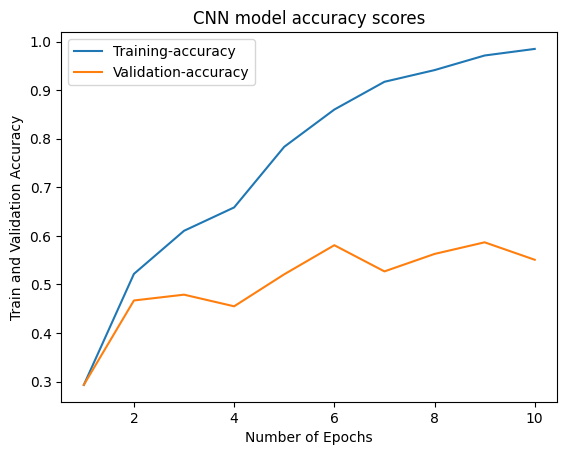

In [27]:
display_model_accuracy(class_4_classification_model(16))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 6 steps
Epoch 1/10
21/21 [==============================] - 4s 185ms/step - loss: 1.3472 - accuracy: 0.3489 - val_loss: 1.3073 - val_accuracy: 0.4611
Epoch 2/10
21/21 [==============================] - 3s 144ms/step - loss: 1.1312 - accuracy: 0.5383 - val_loss: 1.3244 - val_accuracy: 0.4671
Epoch 3/10
21/21 [==============================] - 3s 143ms/step - loss: 0.9427 - accuracy: 0.6436 - val_loss: 1.2539 - val_accuracy: 0.4311
Epoch 4/10
21/21 [==============================] - 3s 144ms/step - loss: 0.8095 - accuracy: 0.6992 - val_loss: 1.1617 - val_accuracy: 0.5689
Epoch 5/10
21/21 [==============================] - 3s 143ms/step - loss: 0.5975 - accuracy: 0.8030 - val_loss: 1.1587 - val_accuracy: 0.5150
Epoch 6/10
21/21 [==============================] - 3s 144ms/step - loss: 0.4580 - accuracy: 0.8842 - val_loss: 1.1372 - val_accuracy: 0.5689
Epoch 7/10
21/21 [==============================] - 3s 14

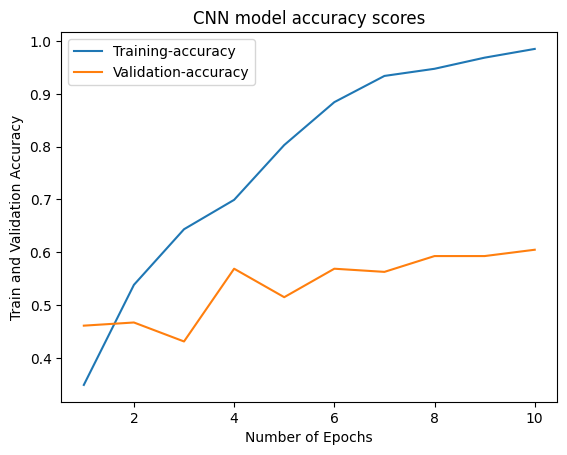

In [28]:
display_model_accuracy(class_4_classification_model(8))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 6 steps
Epoch 1/10
21/21 [==============================] - 4s 188ms/step - loss: 2.8590 - accuracy: 0.2662 - val_loss: 1.4619 - val_accuracy: 0.3353
Epoch 2/10
21/21 [==============================] - 3s 143ms/step - loss: 1.3657 - accuracy: 0.2962 - val_loss: 1.3449 - val_accuracy: 0.3593
Epoch 3/10
21/21 [==============================] - 3s 146ms/step - loss: 1.2930 - accuracy: 0.3308 - val_loss: 1.3286 - val_accuracy: 0.3713
Epoch 4/10
21/21 [==============================] - 3s 145ms/step - loss: 1.2103 - accuracy: 0.4135 - val_loss: 1.2764 - val_accuracy: 0.4192
Epoch 5/10
21/21 [==============================] - 3s 149ms/step - loss: 1.1453 - accuracy: 0.4526 - val_loss: 1.2574 - val_accuracy: 0.4371
Epoch 6/10
21/21 [==============================] - 3s 145ms/step - loss: 1.1031 - accuracy: 0.4812 - val_loss: 1.2722 - val_accuracy: 0.4192
Epoch 7/10
21/21 [==============================] - 3s 14

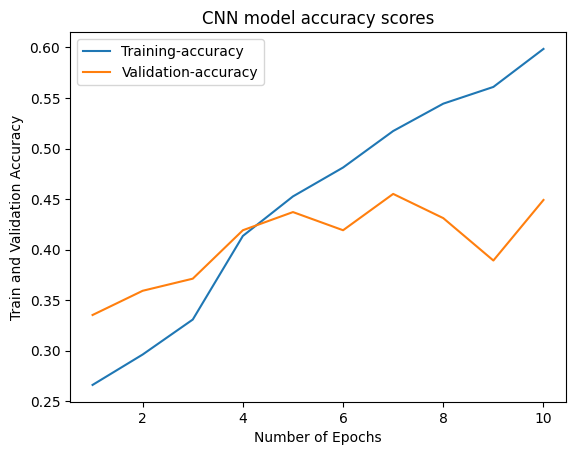

In [29]:
display_model_accuracy(class_4_classification_model(32))

### The model with 8 filters is overfitting, as the validation accuracy is significantly lower than the training accuracy.The model with 16 filters also shows signs of overfitting, but it generalizes slightly better than the model with 8 filters.The model with 32 filters is also overfitting, similar to the model with 8 filters.